In [5]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import os
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import ipywidgets as widgets
from ipywidgets import fixed, interact_manual, widgets
from IPython.display import display
import copy
from scipy.optimize import curve_fit
from scipy.stats import linregress
import pandas as pd
from matplotlib import rcParams

# Local module and scripts
from pyccapt.calibration.calibration import tools, share_variables
from pyccapt.calibration.calibration import widgets as wd
from pyccapt.calibration.data_tools import data_tools, data_loadcrop, dataset_path_qt
from pyccapt.calibration.leap_tools import ccapt_tools
from pyccapt.calibration.calibration import share_variables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
variables = share_variables.Variables()

In [7]:
button = widgets.Button(description='load dataset')

@button.on_click
def open_file_on_click_r(b):
    global dataset_path
    folder_path = variables.last_directory
    script = '..//..//data_tools//run_dataset_path_qt.py'
    cmd = f"python {script} {folder_path}"
    result = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    dataset_path = result.stdout.strip()
    variables.last_directory = dataset_path

button

Button(description='load dataset', style=ButtonStyle())

In [3]:
# flightPathLength = 243 # 105.35 # mm 
# # The initial value for t_0
# t0 = 33 #68.48 # ns

# dataset name
# data_115_Jul-27-2022_17-44_Powersweep3

In [ ]:
# ref_angle = 260
# ref_laser_intensity = 1.4e13
# pulse_energy = ref_laser_intensity * (10 ** ((angle - ref_angle) / (270 * 0.5)))
# # 1 μm^2 =1×10^−8 cm^2
# #Energy per pulse (J) = Power Density (W/cm^2) * Area (cm^2) * Pulse Duration (s)
# pulse_energy = pulse_energy * 6e-8 *  12e-15 * 1e12
# variables.data['pulse'] = pulse_energy

$$\textbf{You can specify the model of the TDC and dataset name down below}$$

In [8]:
tdc, pulse_mode, flightPathLength_d, t0_d, max_mc, det_diam = wd.dataset_instrument_specification_selection()
display(tdc, pulse_mode)

Dropdown(description='Data mode:', options=('pyccapt', 'leap_epos', 'leap_pos', 'leap_apt', 'ato_v6'), value='…

Dropdown(description='Pulse mode:', options=('voltage', 'laser'), value='voltage')

In [33]:
# exctract needed data from Pandas data frame as an numpy array
# create an instance of the Variables opject
variables = share_variables.Variables()
variables.pulse_mode = pulse_mode
dataset_main_path = os.path.dirname(dataset_path)
dataset_name_with_extention = os.path.basename(dataset_path)
variables.dataset_name = os.path.splitext(dataset_name_with_extention)[0]
variables.result_data_path = dataset_main_path 
variables.result_data_name = 'physics_experiment_' + variables.dataset_name
variables.result_path = dataset_main_path + '/physics_experiment/'

if not os.path.isdir(variables.result_path):
    os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
    
# Create data farame out of hdf5 file dataset
data = data_tools.load_data(dataset_path, tdc.value, mode='processed')
# extract data from the path and create the Variable object
data_tools.extract_data(data, variables, flightPathLength_d.value, max_mc.value)

The maximum possible time of flight is: 5010


In [34]:
print('The data will be saved on the path:', variables.result_data_path)
print('=============================')
print('The dataset name after saving is:', variables.result_data_name)
print('=============================')
print('The figures will be saved on the path:', variables.result_path)
print('=============================')
print('Total number of Ions:', len(data))
data

The data will be saved on the path: D:/pyccapt/tests/data/physics_experiment/data_207_Feb-01-2024_13-08_Powersweep/data_processing
The dataset name after saving is: physics_experiment_data_207_Feb-01-2024_13-08_Powersweep
The figures will be saved on the path: D:/pyccapt/tests/data/physics_experiment/data_207_Feb-01-2024_13-08_Powersweep/data_processing/physics_experiment/
Total number of Ions: 707101


,x (nm),y (nm),z (nm),mc (Da),mc_uc (Da),high_voltage (V),pulse,t (ns),t_c (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp,start_counter
0,4.842683,3.169563,0.693609,91.585270,94.859712,7497.013184,4.338470e-09,2054.0002,95.656321,2.920510,1.911490,0,0,0
1,2.255529,-1.523990,0.152034,91.972240,96.093824,7497.013184,4.338470e-09,2051.4219,96.067081,1.342500,-0.907085,0,0,0
2,-4.100531,3.824222,0.650752,90.993520,94.773742,7497.013184,4.338470e-09,2051.8294,95.044254,-2.470330,2.303870,0,0,0
3,-0.102891,-1.237210,0.032157,91.022536,95.251003,7497.013184,4.338470e-09,2039.1333,95.074003,-0.061064,-0.734265,0,0,0
4,4.462692,-3.755792,0.705297,73.730031,77.116163,7497.013184,4.338470e-09,1855.4976,77.011696,2.692070,-2.265640,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707096,3.271896,3.638005,153.621039,101.289531,104.789941,6100.839844,1.079190e-08,2389.5880,105.707473,2.428080,2.699770,0,0,0
707097,-2.263401,4.142898,153.578561,62.128851,64.522173,6100.839844,1.079190e-08,1880.7782,64.839331,-1.677520,3.070510,0,0,0
707098,-0.142830,-1.443642,153.064689,123.107178,128.934806,6100.839844,1.079190e-08,2621.6001,128.480296,-0.104250,-1.053700,0,0,0
707099,-1.189057,2.469648,153.201413,100.244454,104.351700,6100.839844,1.079190e-08,2367.3307,104.622659,-0.871395,1.809870,0,0,0


In [22]:
# laser_power = np.zeros(len(data['high_voltage (V)'].to_numpy()))
# print(len(laser_power))
# laser_power[0:22100] = 50
# laser_power[22100:50000] = 60 #pJ
# laser_power[50000:100000] = 70
# laser_power[100000:150000] = 80
# laser_power[150000:200000] = 90
# laser_power[200000:250000] = 100
# laser_power[250000:300000] = 110
# laser_power[300000:350000] = 120
# laser_power[350000:400000] = 130
# laser_power[400000:450000] = 140
# laser_power[450000:500000] = 150
# laser_power[500000:550000] = 160

# laser_power = laser_power / (3*3*np.pi)

# data.insert(6, 'pulse (deg)', laser_power)
# del data['pulse']

In [23]:
# laser_power = np.zeros(len(variables.data['high_voltage (V)'].to_numpy()))
# print(len(laser_power))
# laser_power[0:22100] = 50
# laser_power[22100:50000] = 60 #pJ
# laser_power[50000:100000] = 70
# laser_power[100000:150000] = 80
# laser_power[150000:200000] = 90
# laser_power[200000:250000] = 100
# laser_power[250000:300000] = 110
# laser_power[300000:350000] = 120
# laser_power[350000:400000] = 130
# laser_power[400000:450000] = 140
# laser_power[450000:500000] = 150
# laser_power[500000:550000] = 160

# variables.data['pulse'] = laser_power

In [24]:
# OD = ((data['pulse'] - 265) / 270) * 2
# scale = (10.0**(OD))
# dld_laser = 4000 * scale
# dld_laserIntensity = (dld_laser*1000) / (4*4*np.pi)

In [25]:
# OD = ((data['pulse (deg)'].to_numpy()-265)/270)*2
# scale = (10.0**(OD))
# dld_laserIntensity = 4000 * scale
# data['pulse (deg)'] = (dld_laserIntensity*1000) / (4*4*np.pi)

In [43]:
# the difference that we have between laser intensity
intensity = data['pulse'].to_numpy() * 1e12
new_intensity = np.unique(intensity)
for i in range(len(new_intensity)):
    if i+1 < len(new_intensity):
        print(new_intensity[i+1] - new_intensity[i])

211.99797473059334
220.18831202785805
232.64457027494245
235.8899742205267
234.98003542954393
253.1415077555721
255.50805915486308
235.02177981526984
224.94717200061132
252.09789811242445
280.3020038300019
282.9709799812008
362.6499101017089
365.65239724950516
391.5179291880122
434.0270365332799
440.01779997415724
405.40637513686306
360.8189302894971
360.1376974415871
292.68854007113987
120.82246314548684


22


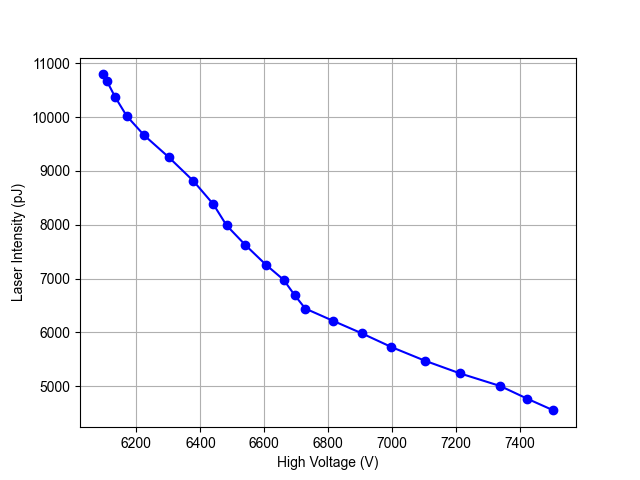

In [40]:
intensity = data['pulse'].to_numpy() * 1e12
dc_voltage = data['high_voltage (V)'].to_numpy()
def find_step_changes(array):
    step_changes = []
    prev_value = array[0]
    
    for i in range(1, len(array)):
        if array[i] > prev_value:
            step_changes.append(i)
            prev_value = array[i]

    return step_changes

def calculate_step_means(array, step_changes):
    step_means = []

    for i in range(len(step_changes) - 1):
        start_index = step_changes[i]
        end_index = step_changes[i + 1]
        step_mean = sum(array[start_index:end_index]) / (end_index - start_index)
        step_means.append(step_mean)

    # Calculate mean for the last step
    last_step_mean = sum(array[step_changes[-1]:]) / (len(array) - step_changes[-1])
    step_means.append(last_step_mean)

    return step_means

def extract_step_values(array, step_changes):
    step_values = []

    for index in step_changes:
        step_values.append(array[index])

    return step_values



steps = find_step_changes(intensity)
print(len(steps))
intensity_values = extract_step_values(intensity, steps)
# intensity_values = np.log(intensity_values)
voltage_means = calculate_step_means(dc_voltage, steps)

# Plotting
# Create a figure and axis
fig, ax = plt.subplots()
plt.plot(voltage_means, intensity_values, marker='o', linestyle='-', color='b')

plt.xlabel('High Voltage (V)')
plt.ylabel('Laser Intensity (pJ)')
# ax.set_yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

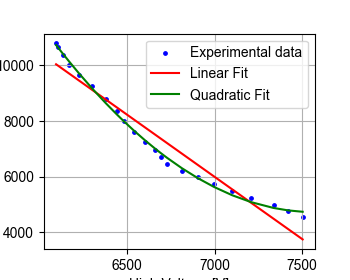

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming intensity_values and voltage_means are your data arrays

# Convert lists to NumPy arrays
intensity_values = np.array(intensity_values)
voltage_means = np.array(voltage_means)

# Split the data into two ranges (0 to 19 and 20 to the end)
intensity_values_1 = intensity_values[:]
voltage_means_1 = voltage_means[:]

# intensity_values_2 = intensity_values[8:]
# voltage_means_2 = voltage_means[8:]

# Take the logarithm of intensity values for both ranges
# log_intensity_values_1 = np.log(intensity_values_1)
# log_intensity_values_2 = np.log(intensity_values_2)
log_intensity_values_1 = intensity_values_1
# log_intensity_values_2 = intensity_values_2

# Define linear and quadratic functions for log-transformed data
def linear_func_log(x, a, b):
    return a * x + b

def quadratic_func_log(x, a, b, c):
    return a * x**2 + b * x + c

# Fit linear function for both ranges
params_linear_log_1, _ = curve_fit(linear_func_log, voltage_means_1, log_intensity_values_1)
# params_linear_log_2, _ = curve_fit(linear_func_log, voltage_means_2, log_intensity_values_2)

# Fit quadratic function for both ranges
params_quadratic_log_1, _ = curve_fit(quadratic_func_log, voltage_means_1, log_intensity_values_1)
# params_quadratic_log_2, _ = curve_fit(quadratic_func_log, voltage_means_2, log_intensity_values_2)

# Plotting on the original scale
fig, ax = plt.subplots(figsize=(3.5,2.8))

# Plotting for the first range (0 to 19)
plt.scatter(voltage_means_1, intensity_values_1, label='Experimental data', color='b', s=6)
plt.plot(voltage_means_1, linear_func_log(voltage_means_1, *params_linear_log_1), label='Linear Fit', color='r')
plt.plot(voltage_means_1, quadratic_func_log(voltage_means_1, *params_quadratic_log_1), label='Quadratic Fit', color='g')

# Plotting for the second range (20 to the end)
# plt.scatter(voltage_means_2, intensity_values_2, label='Experimental data (8-end)', color='c')
# plt.plot(voltage_means_2, linear_func_log(voltage_means_2, *params_linear_log_2), label='Linear Fit (8-end)', color='m')
# plt.plot(voltage_means_2, quadratic_func_log(voltage_means_2, *params_quadratic_log_2), label='Quadratic Fit (8-end)', color='y')

# plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('High Voltage [V]', fontsize=10)
plt.ylabel('Pulse Energy [pJ]', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'
plt.savefig(variables.result_path + "fs_PE_vs_voltage.png", format="png", dpi=600)
plt.savefig(variables.result_path + "fs_PE_vs_voltage.svg", format="svg", dpi=600)
# plt.savefig(variables.result_path + "fs_intensity_vs_voltage.png", format="png", dpi=600)
# plt.savefig(variables.result_path + "fs_intensity_vs_voltage.svg", format="svg", dpi=600)
plt.show()


In [19]:
dataset_path_leap = 'D:/pyccapt/tests\data/physics_experiment/R56_06712-v01.epos'
data_leap = data_tools.load_data(dataset_path_leap, 'leap_epos', mode='processed')
laser_power = np.zeros(len(data_leap['high_voltage (V)'].to_numpy()))

laser_power[0:22100] = 50
laser_power[22100:50000] = 60 #pJ
laser_power[50000:100000] = 70
laser_power[100000:150000] = 80
laser_power[150000:200000] = 90
laser_power[200000:250000] = 100
laser_power[250000:300000] = 110
laser_power[300000:350000] = 120
laser_power[350000:400000] = 130
laser_power[400000:450000] = 140
laser_power[450000:500000] = 150
laser_power[500000:550000] = 160

data_leap['pulse'] = laser_power

intensity_leap = data_leap['pulse'].to_numpy()
dc_voltage_leap = data_leap['high_voltage (V)'].to_numpy()

def find_step_changes(array):
    step_changes = []
    prev_value = array[0]
    
    for i in range(1, len(array)):
        if array[i] > prev_value:
            step_changes.append(i)
            prev_value = array[i]

    return step_changes

def calculate_step_means(array, step_changes):
    step_means = []

    for i in range(len(step_changes) - 1):
        start_index = step_changes[i]
        end_index = step_changes[i + 1]
        step_mean = sum(array[start_index:end_index]) / (end_index - start_index)
        step_means.append(step_mean)

    # Calculate mean for the last step
    last_step_mean = sum(array[step_changes[-1]:]) / (len(array) - step_changes[-1])
    step_means.append(last_step_mean)

    return step_means

def extract_step_values(array, step_changes):
    step_values = []

    for index in step_changes:
        step_values.append(array[index])

    return step_values



steps_leap = find_step_changes(intensity_leap)
print(len(steps_leap))
intensity_values_leap = extract_step_values(intensity_leap, steps_leap)
voltage_means_leap = calculate_step_means(dc_voltage_leap, steps_leap)

# Plotting
# Create a figure and axis
fig, ax = plt.subplots()
plt.plot(voltage_means_leap, intensity_values_leap, marker='o', linestyle='-', color='b')

plt.xlabel('High Voltage [V]')
plt.ylabel('Pulse Energy [pJ]')
plt.grid()
plt.show()

KeyError: 'det_x (cm)'

In [16]:
from scipy.optimize import curve_fit
from scipy.stats import linregress
# Convert lists to NumPy arrays
intensity_values_leap = np.array(intensity_values_leap)
voltage_means_leap = np.array(voltage_means_leap)

# Define linear and quadratic functions
def linear_func(x, a, b):
    return a * x + b

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit linear function
params_linear, _ = curve_fit(linear_func, voltage_means_leap, intensity_values_leap)

# Fit quadratic function
params_quadratic, _ = curve_fit(quadratic_func, voltage_means_leap, intensity_values_leap)

# Calculate R-squared values
residuals_linear = intensity_values_leap - linear_func(voltage_means_leap, *params_linear)
residuals_quadratic = intensity_values_leap - quadratic_func(voltage_means_leap, *params_quadratic)

ssr_linear = np.sum(residuals_linear**2)
ssr_quadratic = np.sum(residuals_quadratic**2)

r_squared_linear = 1 - (ssr_linear / np.sum((intensity_values_leap - np.mean(intensity_values_leap))**2))
r_squared_quadratic = 1 - (ssr_quadratic / np.sum((intensity_values_leap - np.mean(intensity_values_leap))**2))

# Determine which model has a better fit based on R-squared values
if r_squared_quadratic > r_squared_linear:
    best_fit_model = "Quadratic"
else:
    best_fit_model = "Linear"

# Print the results
print(f"R-squared Linear: {r_squared_linear}")
print(f"R-squared Quadratic: {r_squared_quadratic}")
print(f"Better Fit Model: {best_fit_model}")

# Plotting
fig, ax = plt.subplots()
plt.scatter(voltage_means_leap, intensity_values_leap, label='Experimental data', color='b')
plt.plot(voltage_means_leap, linear_func(voltage_means_leap, *params_linear), label='Linear Fit', color='r')
# plt.plot(voltage_means_leap, quadratic_func(voltage_means_leap, *params_quadratic), label='Quadratic Fit', color='g')


plt.xlabel('High Voltage [V]', fontsize=10)
plt.ylabel('Pulse Energy [pJ]', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)
rcParams['svg.fonttype'] = 'none'
plt.savefig("leap_intensity_vs_voltage.png", format="png", dpi=600)
plt.savefig("leap_intensity_vs_voltage.svg", format="svg", dpi=600)
plt.show()

NameError: name 'intensity_values_leap' is not defined

In [44]:
data

,x (nm),y (nm),z (nm),mc_c (Da),mc (Da),high_voltage (V),pulse,start_counter,t_c (ns),t (ns),x_det (cm),y_det (cm),pulse_pi,ion_pp
0,0.0,0.0,0.0,0.0,66.899809,7017.655762,32491.093750,0,0.0,1763.0,1.018470,1.04537,0,0
1,0.0,0.0,0.0,0.0,273.505279,7017.655762,32491.093750,0,0.0,3550.0,-1.789560,-1.41297,0,0
2,0.0,0.0,0.0,0.0,10.049537,7017.655762,32491.093750,0,0.0,698.0,0.262643,-1.78122,0,0
3,0.0,0.0,0.0,0.0,39.882757,7017.655762,32491.093750,0,0.0,1368.0,-1.007770,1.58294,0,0
4,0.0,0.0,0.0,0.0,246.549648,7017.655762,32491.093750,0,0.0,3372.0,-0.059632,-2.30430,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760194,0.0,0.0,0.0,0.0,62.747625,7018.127441,87376.359375,0,0.0,1718.0,1.205250,2.81175,0,0
760195,0.0,0.0,0.0,0.0,94.678047,7018.127441,87376.359375,0,0.0,2113.0,-2.736540,2.56835,0,0
760196,0.0,0.0,0.0,0.0,96.881623,7018.127441,87376.359375,0,0.0,2136.0,-3.260550,-1.66019,0,0
760197,0.0,0.0,0.0,0.0,96.447664,7018.127441,87376.359375,0,0.0,2115.0,-0.355488,-1.91823,0,0


In [ ]:
dld_highVoltage = data['high_voltage (V)'].to_numpy()
# dld_laserIntensity = data['pulse (deg)'].to_numpy()
dld_t = data['t (ns)'].to_numpy()
dld_x = data['x_det (cm)'].to_numpy()
dld_y = data['y_det (cm)'].to_numpy()
mc = data['mc_c (Da)'].to_numpy()

In [ ]:
# dld_t_c = data['t_c (ns)'].to_numpy()
# np.save('D:/pyccapt/tests/data/W_LEAP/t_leap.npy', dld_t)
# np.save('D:/pyccapt/tests/data/W_LEAP/t_c_leap.npy', dld_t_c)

In [ ]:
data_loadcrop.plot_crop_experimetn_history(data, save_name=variables.result_path + '//ex_hist_' + dataset_name, figure_size=(8, 4), laser=data['pulse (deg)'].to_numpy())

In [ ]:
peaks_ini, peaks_y_ini, peak_widths_p_ini = tools.hist_plot(mc[mc<150], 0.1, distance=100, percent=50, prominence=50, selector='rect', plot=True, label='mc', fig_name=figname+'_ini')
index_max_ini = np.argmax(peaks_y_ini)
variables.max_peak = peaks_ini[index_max_ini]
variables.peak = peaks_ini
mrp = (peaks_ini[index_max_ini] / (peak_widths_p_ini[index_max_ini][2] - peak_widths_p_ini[index_max_ini][1]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_ini)):
    print('Peaks ', i, 'is at location and height: ({:.2f}, {:.2f})'.format(peaks_ini[i], peaks_y_ini[i]), 'peak window sides ({:.1f}-maximum) are: ({:.2f}, {:.2f})'.format(50, peak_widths_p_ini[i][1], peak_widths_p_ini[i][2]), '-> {:.2f}'.format(peak_widths_p_ini[i][2] - peak_widths_p_ini[i][1]))


In [ ]:
dld_t_c_171 = np.load('D:/pyccapt/tests/data/data_115_Jul-27-2022_17-44_Powersweep3/t_171.npy')
dld_t_c_12 = np.load('T:/Monajem/physics_atom_probe_data/data_124_Apr-18-2023_18-46_LFIM1/t_12.npy')
tt = np.load('D:/pyccapt/tests/data/W_LEAP/t_leap.npy')

fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.set_xlabel("Time of Flight [ns]", fontsize=8)
ax1.set_ylabel("frequency [cts]", fontsize=8)
# plt.title("Time of Flight")

bins = np.linspace(np.min(dld_t_c_171), np.max(dld_t_c_171), round(np.max(dld_t_c_171) / 1))
y, x = np.histogram(dld_t_c_171, bins=bins)
plt.plot(x[:-1], y, color='blue', label='171 fs', alpha = 0.75)

bins = np.linspace(np.min(dld_t_c_12), np.max(dld_t_c_12), round(np.max(dld_t_c_12) / 1))
y, x = np.histogram(dld_t_c_12, bins=bins)
plt.plot(x[:-1], y, color='red', label='12 fs', alpha = 0.75)

bins = np.linspace(np.min(tt), np.max(tt), round(np.max(tt) / 1))
y, x = np.histogram(tt, bins=bins)
plt.plot(x[:-1], y, color='green', label='LEAP 4000x', alpha = 0.75)


ax1.legend()
ax1.set_yscale('log')
plt.show()

In [ ]:
dld_t_c_171 = np.load('D:/pyccapt/tests/data/data_115_Jul-27-2022_17-44_Powersweep3/t_171_c.npy')
dld_t_c_12 = np.load('D:/pyccapt/tests/data/data_124_Apr-18-2023_18-46_LFIM1/t_12_c.npy')
tt = np.load('D:/pyccapt/tests/data/W_LEAP/t_c_leap.npy')

fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.set_xlabel("Time of Flight [ns]", fontsize=8)
ax1.set_ylabel("frequency [cts]", fontsize=8)
# plt.title("Time of Flight")

bins = np.linspace(np.min(dld_t_c_171), np.max(dld_t_c_171), round(np.max(dld_t_c_171) / 1))
y, x = np.histogram(dld_t_c_171, bins=bins)
plt.plot(x[:-1], y, color='blue', label='171 fs', alpha = 0.75)

bins = np.linspace(np.min(dld_t_c_12), np.max(dld_t_c_12), round(np.max(dld_t_c_12) / 1))
y, x = np.histogram(dld_t_c_12, bins=bins)
plt.plot(x[:-1]+2.5, y, color='red', label='12 fs', alpha = 0.75)

bins = np.linspace(np.min(tt), np.max(tt), round(np.max(tt) / 1))
y, x = np.histogram(tt, bins=bins)
plt.plot(x[:-1]-204.5, y, color='green', label='LEAP 4000x', alpha = 0.75)


ax1.legend()
ax1.set_yscale('log')
plt.show()

In [ ]:
dld_t_c_171 = np.load('D:/pyccapt/tests/data/data_115_Jul-27-2022_17-44_Powersweep3/t_171_c.npy')
dld_t_c_12 = np.load('D:/pyccapt/tests/data/data_124_Apr-18-2023_18-46_LFIM1/t_12_c.npy')


fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.set_xlabel("Time of Flight [ns]", fontsize=8)
ax1.set_ylabel("frequency [cts]", fontsize=8)
plt.title("Time of Flight Calibrated")

bins = np.linspace(np.min(dld_t_c_171), np.max(dld_t_c_171), round(np.max(dld_t_c_171) / 0.1))
y, x = np.histogram(dld_t_c_171, bins=bins)
plt.plot(x[:-1], y, color='blue', label='171 fs', alpha = 0.75)

bins = np.linspace(np.min(dld_t_c_12), np.max(dld_t_c_12), round(np.max(dld_t_c_12) / 0.1))
y, x = np.histogram(dld_t_c_12, bins=bins)
plt.plot(x[:-1], y, color='red', label='12 fs', alpha = 0.75)

# file = 'T:/Monajem/Physics/data_LEAP_April-24-2023_W_Laser_Powersweep/R56_06712_CorrectedTOF_full.csv'
file = 'T:/Monajem/physics_atom_probe_data/data_LEAP_April-24-2023_W_Laser_Powersweep/R56_06712_CorrectedTOF.csv'
df = pd.read_csv(file)
hist = df['Corrected TOF (ns)']
count = df['Count']
plt.plot(hist[hist < 8000] - 1511, count[hist < 8000], color='green', label='LEAP', alpha = 0.75)

ax1.legend()
ax1.set_yscale('log')
plt.show()

In [ ]:
def mc_hist_plot(mc_c, range_ions, bin_size, prominence, distance, percent, selector, plot, figname, lim_mc):
    import re
    range_ions = re.findall(r'\d+', range_ions)
    print(range_ions)
    peaks_ini, peaks_y_ini, peak_widths_p_ini = tools.hist_plot(mc_c[int(range_ions[0]):int(range_ions[1])], bin_size, distance=distance, percent=percent, prominence=prominence, selector=selector, plot=plot, label='mc', fig_name=figname+'%s' %range_ions)
    index_max_ini = np.argmax(peaks_y_ini)
    variables.max_peak = peaks_ini[index_max_ini]
    variables.peak = peaks_ini
    mrp = (peaks_ini[index_max_ini] / (peak_widths_p_ini[index_max_ini][2] - peak_widths_p_ini[index_max_ini][1]))
    print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
    for i in range(len(peaks_ini)):
        print('Peaks ', i, 'is at location and height: ({:.2f}, {:.2f})'.format(peaks_ini[i], peaks_y_ini[i]), 'peak window sides ({:.1f}-maximum) are: ({:.2f}, {:.2f})'.format(percent, peak_widths_p_ini[i][1], peak_widths_p_ini[i][2]), '-> {:.2f}'.format(peak_widths_p_ini[i][2] - peak_widths_p_ini[i][1]))

interact_manual(mc_hist_plot, mc_c=fixed(mc), range_ions=widgets.Text(value='10, 10000'), bin_size=widgets.FloatText(value=0.1)
               ,prominence=widgets.IntText(value=50), distance=widgets.IntText(value=100), lim_mc=widgets.IntText(value=400)
               ,percent=widgets.IntText(value=50), selector=fixed('rect'), plot=fixed(True), figname=fixed(figname));


$$\textbf{Below plotted graph offers peak selection. You can select relevant peaks you want for computation.}$$

In [ ]:
OD = (dld_laserIntensity - 265) / 270
dld_laserIntensity_p = 10.0**OD

dld_laserIntensity_p = dld_laserIntensity_p / np.max(dld_laserIntensity_p)

high_voltage = dld_highVoltage / np.max(dld_highVoltage)

fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_laserIntensity_p, high_voltage, color="blue", label='points', alpha=0.1)
ax1.set_ylabel("High voltage reduction", color="red", fontsize=10)
ax1.set_xlabel("Laser intensity (Fraction of laser power)", color="red", fontsize=10)

p = np.polyfit(dld_laserIntensity_p, high_voltage, 2)

y = plt.plot(dld_laserIntensity_p, np.polyval(p, dld_laserIntensity_p), color='red',label='Best Fit-2')


plt.legend(handles=[x, y[0]], loc='upper right')
if save==True:
    plt.savefig(variables.result_path + "//graph_2_%s.svg" % figname, format="svg", dpi=600)
    plt.savefig(variables.result_path + "//graph_2_%s.png" % figname, format="png", dpi=600)
plt.show()